### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.random.seed(42)
sns.set()

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [3]:
bootstrap_samples = []
for i in range(10000):
    sample = sample_data.sample(200, replace=True)
    drinker = sample[sample['drinks_coffee'] == True]['height'].mean()
    non_drinker = sample[sample['drinks_coffee'] == False]['height'].mean()
    bootstrap_samples.append(drinker - non_drinker)


The 99% Confidence Interval is from 0.10258900080921124 ---- 2.538833370796657


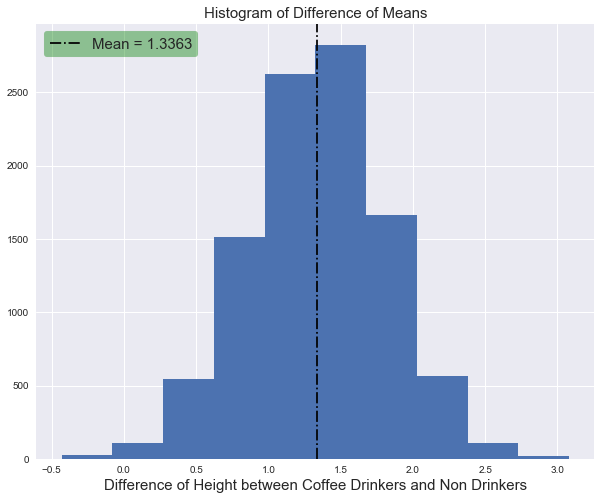

In [4]:
plt.figure(figsize=(10, 8))
plt.hist(bootstrap_samples)
plt.xlabel('Difference of Height between Coffee Drinkers and Non Drinkers', fontsize=15)
plt.title('Histogram of Difference of Means', fontsize=15)
plt.axvline(np.mean(bootstrap_samples), linestyle='-.', label='Mean = {}'.format(np.mean(bootstrap_samples).round(4)), color='k')
plt.legend(loc='upper left', fontsize=15, frameon=True, facecolor='g', framealpha = 0.4)

ci = np.percentile(bootstrap_samples, [0.5, 99.5])
print('The 99% Confidence Interval is from {} ---- {}'.format(ci[0], ci[1])) 

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [5]:
bootstrap_samples_2 = []
for i in range(10000):
    sample = sample_data.sample(200, replace=True)
    ab = sample[sample['age'] == '>=21']['height'].mean()
    below = sample[sample['age'] == '<21']['height'].mean()
    bootstrap_samples_2.append(ab - below)


The 99% Confidence Interval is from 3.3652749452554795 ---- 5.0932450670661495


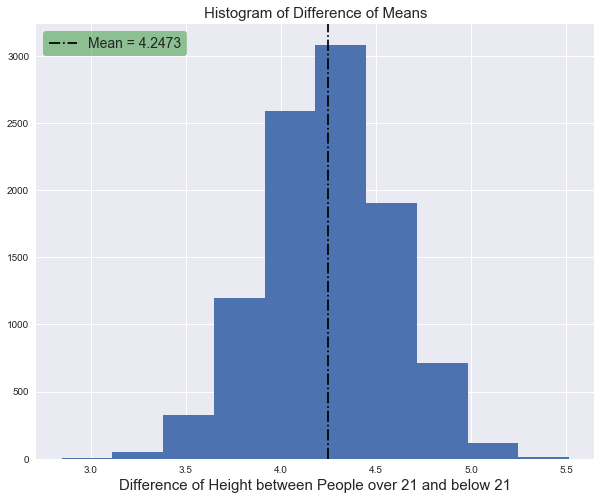

In [13]:
plt.figure(figsize=(10, 8))
plt.hist(bootstrap_samples_2)
plt.xlabel('Difference of Height between People over 21 and below 21', fontsize=15)
plt.title('Histogram of Difference of Means', fontsize=15)
plt.axvline(np.mean(bootstrap_samples_2), linestyle='-.', label='Mean = {}'.format(np.mean(bootstrap_samples_2).round(4))\
            ,color='k')
plt.legend(loc='upper left', fontsize=14, frameon=True, facecolor='g', framealpha = 0.4)

ci2 = np.percentile(bootstrap_samples_2, [0.5, 99.5])
print('The 99% Confidence Interval is from {} ---- {}'.format(ci2[0], ci2[1]))

In [7]:
(np.array(bootstrap_samples_2) > 0).all()

True

`3.` For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals under 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [8]:
bt_samples = []
for i in range(10000):
    sample = sample_data.sample(200, replace=True)
    under_21 = sample[sample['age'] == '<21']
    coffee_drinker = under_21[under_21['drinks_coffee'] == True]['height'].mean()
    non_drinker = under_21[under_21['drinks_coffee'] == False]['height'].mean()
    bt_samples.append(coffee_drinker - non_drinker)


The 95% Confidence Interval is -2.5931557940679038 ---- -1.0593651244624271


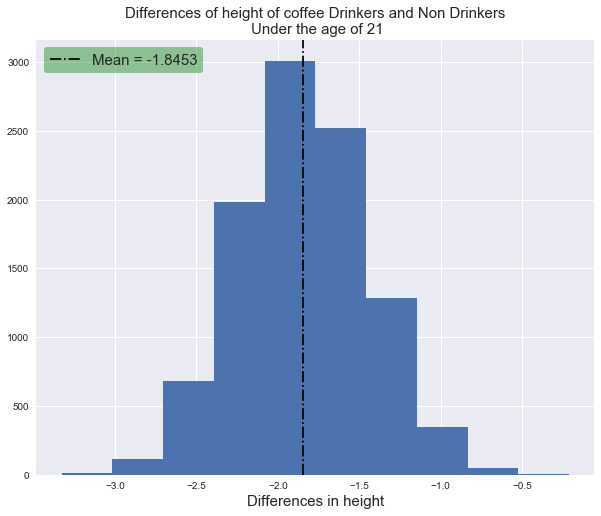

In [9]:
plt.figure(figsize=(10,8))
plt.hist(bt_samples)
plt.xlabel('Differences in height', fontsize=15)
plt.title('Differences of height of coffee Drinkers and Non Drinkers\n Under the age of 21', fontsize=15)
plt.axvline(np.mean(bt_samples), linestyle='-.', label='Mean = {}'.format(np.mean(bt_samples).round(4)), color='k')
plt.legend(loc='upper left', fontsize=15, frameon=True, facecolor='g', framealpha = 0.4)

ci3 = np.percentile(bt_samples, [2.5, 97.5])
print('The 95% Confidence Interval is {} ---- {}'.format(ci3[0], ci3[1])) 

`4.` For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals under 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

In [10]:
bt_samples_1 = []
for i in range(10000):
    sample = sample_data.sample(200, replace=True)
    over_21 = sample[sample['age'] != '<21']
    coffee_drinker = over_21[over_21['drinks_coffee'] == True]['height'].mean()
    non_drinker = over_21[over_21['drinks_coffee'] == False]['height'].mean()
    bt_samples_1.append(coffee_drinker - non_drinker)


In [11]:
len(bt_samples_1)

10000

The 95% Confidence Interval is -4.402632965477435 ---- -1.827895397088367


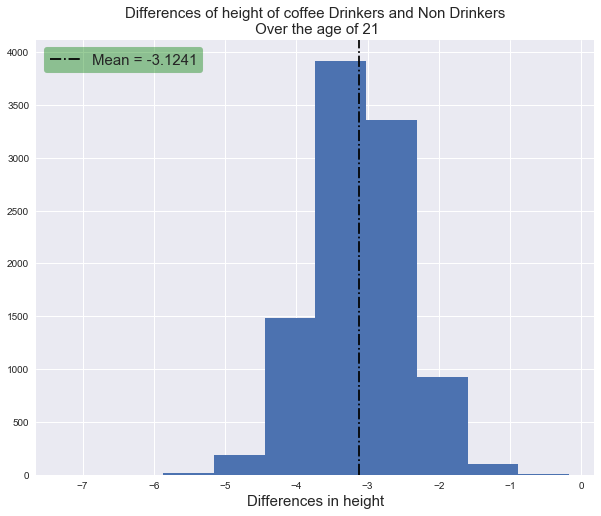

In [12]:
plt.figure(figsize=(10,8))
plt.hist(bt_samples_1)
plt.xlabel('Differences in height', fontsize=15)
plt.title('Differences of height of coffee Drinkers and Non Drinkers\n Over the age of 21', fontsize=15);
plt.axvline(np.mean(bt_samples_1), linestyle='-.', label='Mean = {}'.format(np.mean(bt_samples_1).round(4)), color='k')
plt.legend(loc='upper left', fontsize=15, frameon=True, facecolor='g', framealpha = 0.4)

ci4 = np.percentile(bt_samples_1, [2.5, 97.5])
print('The 95% Confidence Interval is {} ---- {}'.format(ci4[0], ci4[1]))